# **關於台灣醫療資源與國人平均壽命之關聯**
## 問題
常常看見新聞在播報有關台灣醫療機構人力，特別是醫院的醫護人員人手常常不足，而很容易使得每位醫療人員的工時更長，壓力更大，形成一間間血汗醫院，而台灣又因為地區不同而造成醫療資源差異，那是否會使得不同地區人民存活率的差異
## 目標
希望這些數據與圖表能讓大家更正視醫療資源平均非配的重要性以及護理人員的人權，畢竟他們也是要休息的，居住在不同地區的居民繳相同的稅，享受的資源理應相同，而不是被這些後天可改善因素而縮短其存活年數。

## 蒐集資料
1. 從政府資料開放平臺獲取各鄉鎮市區人口密度資料，並使用其最新106年度之統計資料
2. 從政府開放資料平臺獲取[醫院人力統計資料](https://data.gov.tw/dataset/6474)，檔案為壓縮檔，所以用下載方式處理並由其中獲取106年各鄉鎮市區醫院人力統計資料
3. 從內政部統計處獲取[歷年簡易生命表](https://www.moi.gov.tw/stat/node.aspx?cate_sn=&belong_sn=6189&sn=6190)，並從中整理出各縣市5年內的平均壽命統計 

## 資料分析
- 爬抓各區人口數與人口密度資料
    - 處理掉不要的年度欄與最後幾列說明列

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif']=['SimHei']

#抓各區人口數與人口密度資料並處理掉不要的年度欄與最後幾列說明列
url='https://quality.data.gov.tw/dq_download_csv.php?nid=8410&md5_url=df720b0415d666fd8632336bc28ce2a0'
popudata=pd.read_csv(url,encoding='utf-8')
#print(type(popudata.head())) is <class 'pandas.core.frame.DataFrame'>
popudata.drop(['statistic_yyy'],axis=1,inplace=True)
popudata.drop([0,369,370,371,372,373,374,375],inplace=True)
popudata.columns=['區域別','年底人口數','土地面積','人口密度']
popudata.head()

,區域別,年底人口數,土地面積,人口密度
1,新北市板橋區,551480,23.1373,23835
2,新北市三重區,387484,16.317,23747
3,新北市中和區,413590,20.144,20532
4,新北市永和區,222585,5.7138,38956
5,新北市新莊區,416524,19.7383,21102


- 讀入106年各鄉鎮市區醫院人力統計資料並選取有效資料欄位

In [2]:
import pandas as pd
df=pd.read_csv("C:/Users/Administrator/Desktop/106hosHR2.csv",encoding = 'utf-8')
newdf=df.loc[:, ["鄉鎮市區名稱","醫院家數","醫事人員總計","護理師","護士"]]
newdf["護理人員總計"]=newdf["護理師"]+newdf["護士"]
newdf.head()

,鄉鎮市區名稱,醫院家數,醫事人員總計,護理師,護士,護理人員總計
0,臺北市松山區,5,2178,1130,140,1270
1,臺北市大安區,5,2485,1258,120,1378
2,臺北市大同區,1,4407,2483,165,2648
3,臺北市中山區,4,2777,1562,77,1639
4,臺北市內湖區,3,3262,1842,87,1929


 - 合併前兩項資料並計算每個縣市醫事人員與護理人員分配比例

In [18]:
#因為前兩項資料有誤差，用字典方式對應各鄉鎮市區的年底人口數與人口密度
import pandas as pd

#抓各區人口數與人口密度資料並處理掉不要的年度欄與最後幾列說明列
url='https://quality.data.gov.tw/dq_download_csv.php?nid=8410&md5_url=df720b0415d666fd8632336bc28ce2a0'
popudata=pd.read_csv(url,encoding='utf-8')
#print(type(popudata.head())) is <class 'pandas.core.frame.DataFrame'>
popudata.drop(['statistic_yyy'],axis=1,inplace=True)
popudata.drop([0,369,370,371,372,373,374,375],inplace=True)
popudata.columns=['區域別','年底人口數','土地面積','人口密度']

import pandas as pd
df=pd.read_csv("C:/Users/Administrator/Desktop/106hosHR2.csv",encoding = 'utf-8')
newdf=df.loc[:, ["鄉鎮市區名稱","醫院家數","醫事人員總計","護理師","護士"]]
newdf["護理人員總計"]=newdf["護理師"]+newdf["護士"]

newdic={}
for i in range(1,len(popudata["區域別"])+1):
	newdic[popudata["區域別"][i]] = int(popudata['年底人口數'][i])

peo_info=[]
for i in range(len(newdf)):
	if newdf["鄉鎮市區名稱"][i] in newdic:
		peo_info.append(newdic[newdf["鄉鎮市區名稱"][i]])
df1=pd.DataFrame(peo_info,columns=['年底人口數'])
newdf = pd.concat([newdf, df1], axis=1)
newdf["分配比例(護)"]= newdf['年底人口數'] / newdf["護理人員總計"]
newdf["分配比例總"]= newdf['年底人口數'] / newdf["醫事人員總計"]
newdf.head()

,鄉鎮市區名稱,醫院家數,醫事人員總計,護理師,護士,護理人員總計,年底人口數,分配比例(護),分配比例總
0,臺北市松山區,5,2178,1130,140,1270,206988,162.982677,95.035813
1,臺北市大安區,5,2485,1258,120,1378,309969,224.941219,124.736016
2,臺北市大同區,1,4407,2483,165,2648,129278,48.820997,29.334695
3,臺北市中山區,4,2777,1562,77,1639,230710,140.762660,83.078862
4,臺北市內湖區,3,3262,1842,87,1929,287771,149.181441,88.219191


In [7]:
newdf.年底人口數.corr(newdf.護理人員總計)

0.5030863270357873

In [8]:
newdf.年底人口數.corr(newdf.醫事人員總計)

0.5104013262616303

In [9]:
#以全台總年底人口數除以總護理人員數而得基本照護標準
standard=newdf['年底人口數'].sum()/newdf["護理人員總計"].sum()
print(standard) 

169.9475585564271


→ 標準為1位護理人員專門照顧170位病人

In [10]:
#護理人員各區分配比例平均值
newdf["分配比例(護)"].mean()

807.3109849286099

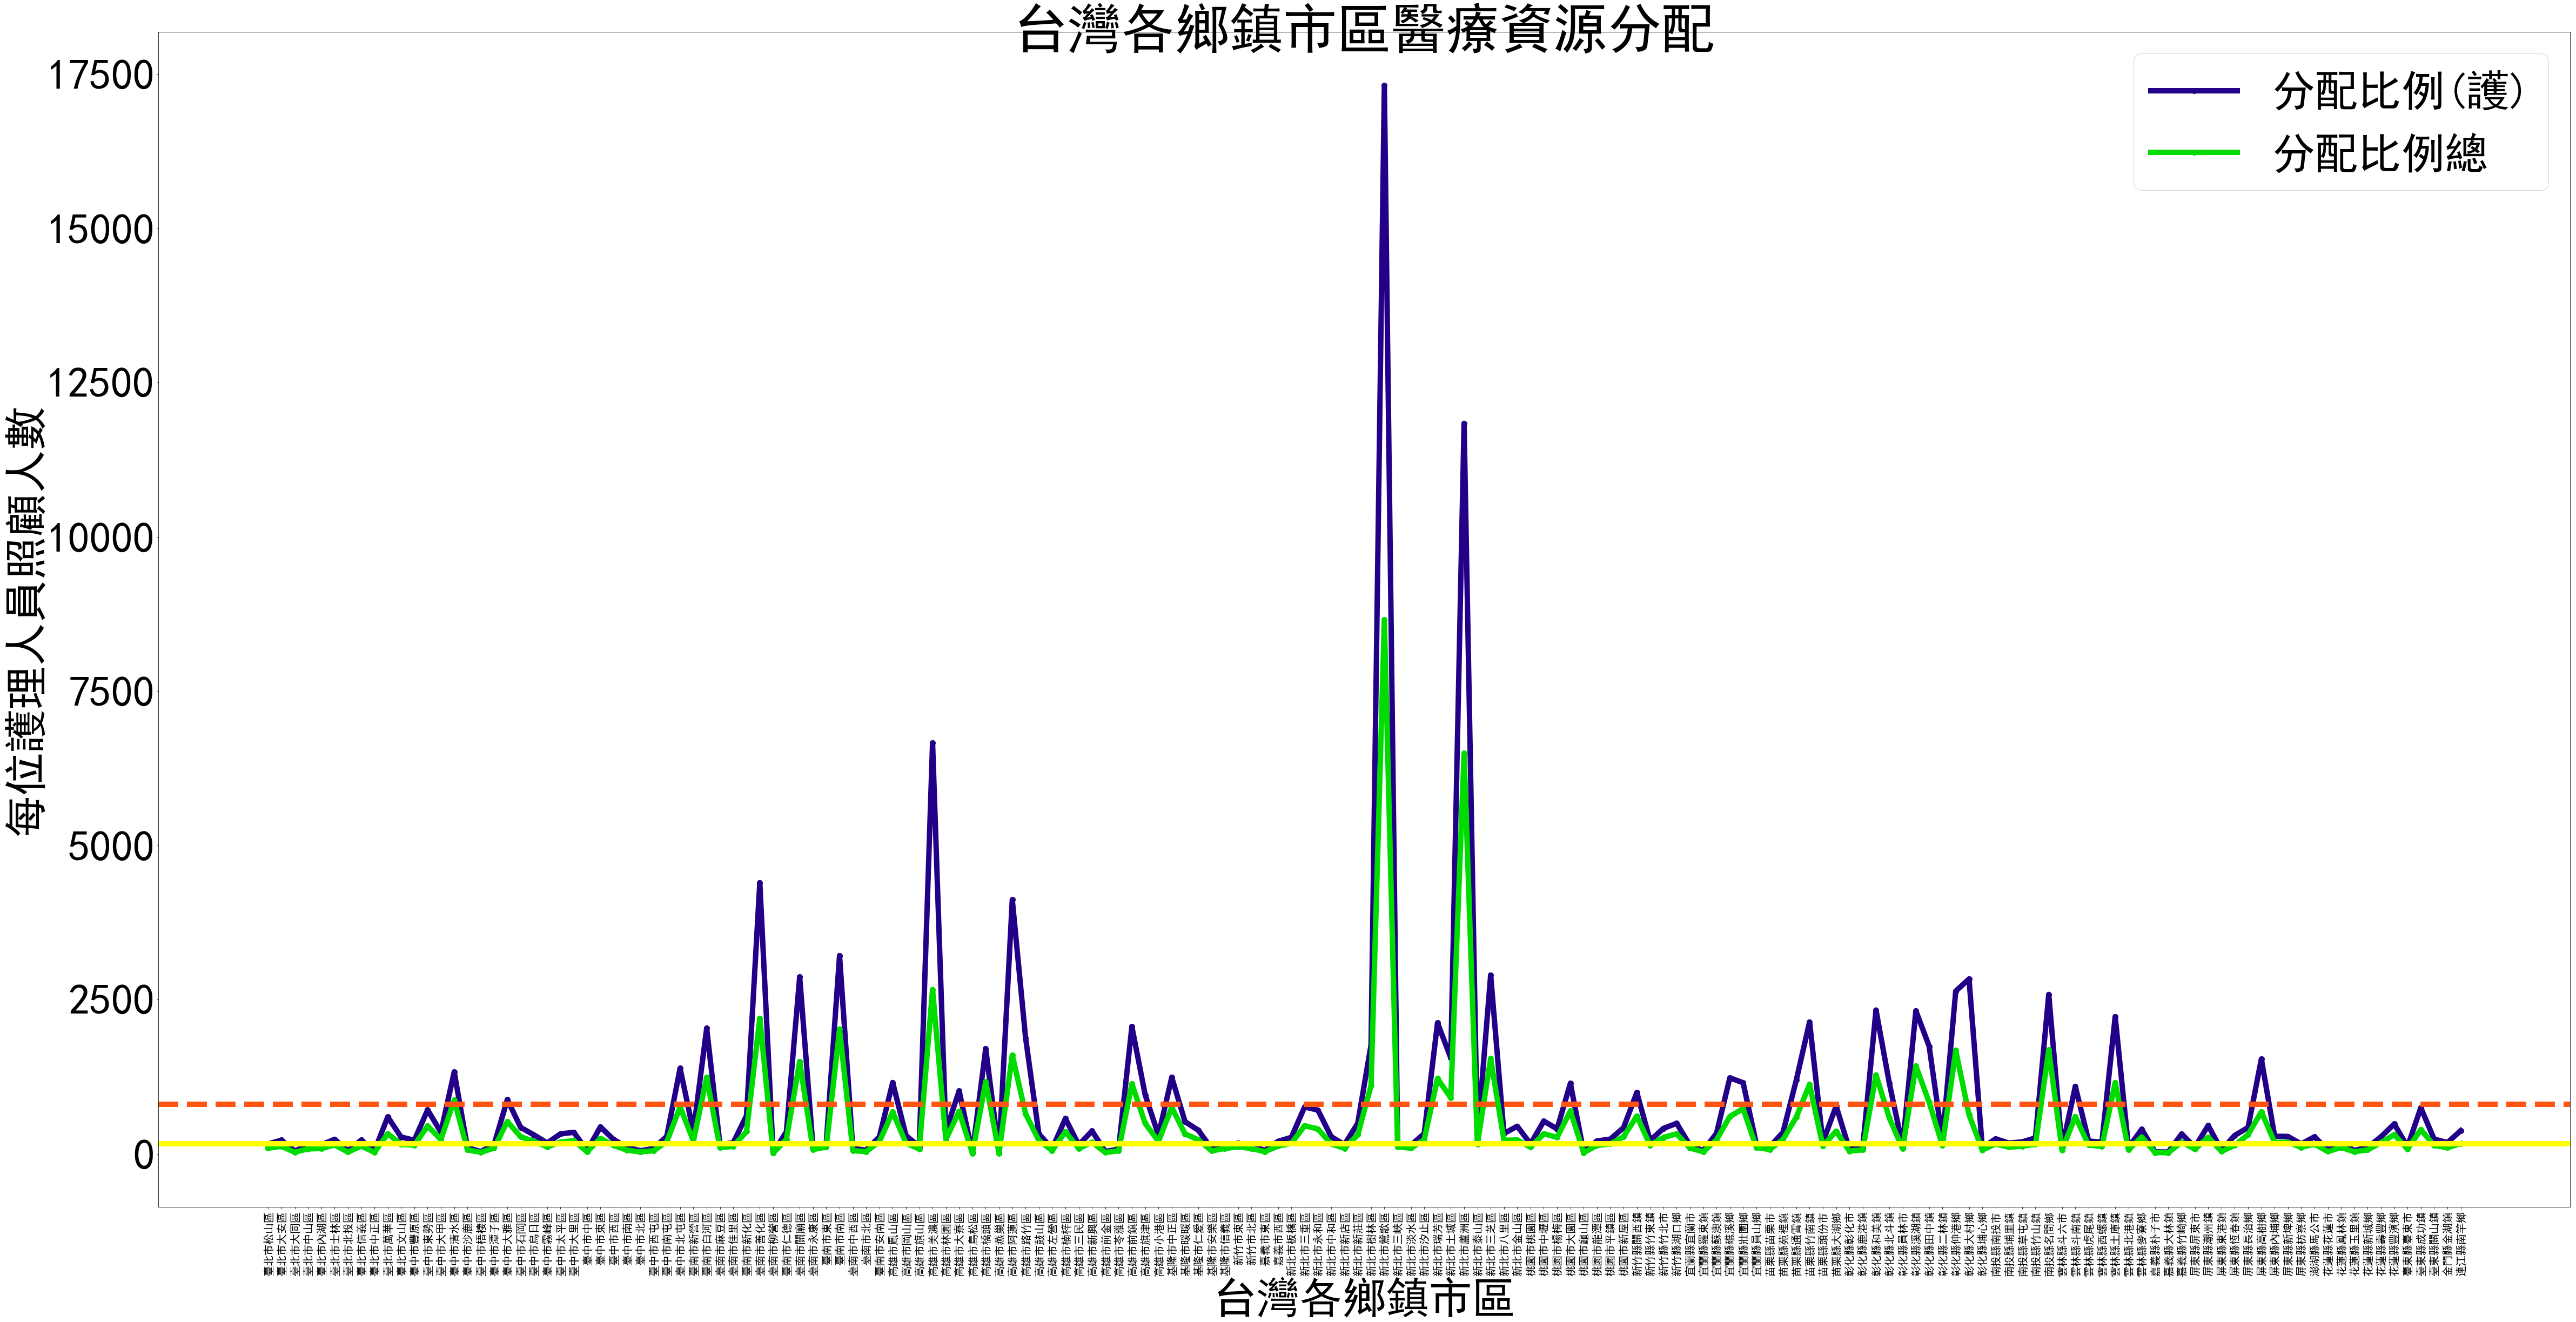

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif']=['SimHei']

plt.figure(figsize=(80,40))
plt.plot(newdf["鄉鎮市區名稱"],newdf["分配比例(護)"], '-o',color="#220088",ms=10,linewidth=10)
plt.plot(newdf["鄉鎮市區名稱"],newdf["分配比例總"], '-o',color="#00db00",ms=10,linewidth=10)
plt.axhline(y=newdf["分配比例(護)"].mean(),color="#FF5511",linestyle="--",linewidth=10)
plt.axhline(y=standard,color="#FFFF00",linestyle="-",linewidth=10)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=80)
plt.xlabel('台灣各鄉鎮市區',fontsize=80)
plt.ylabel('每位護理人員照顧人數',fontsize=80)
plt.title('台灣各鄉鎮市區醫療資源分配',fontsize=100,fontweight='medium',verticalalignment='center')
plt.legend(prop={"size":80})
plt.show()

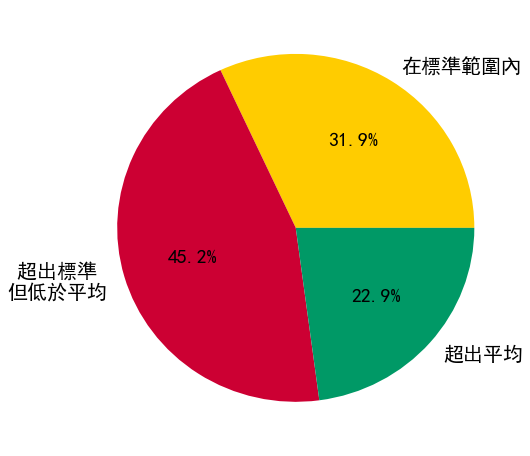

In [12]:
size=[0,0,0]
for i in range(len(newdf["分配比例(護)"])):
	if newdf["分配比例(護)"][i] < standard:
		size[0]+=1
	elif newdf["分配比例(護)"][i] >= standard and newdf["分配比例(護)"][i] < (newdf["分配比例(護)"].mean()):
		size[1]+=1
	elif newdf["分配比例(護)"][i] > (newdf["分配比例(護)"].mean()):
		size[2]+=1

plt.rcParams.update({'font.size':20})
plt.figure(figsize=(8,8))
plt.pie(size,labels=["在標準範圍內","超出標準 \n但低於平均","超出平均"],colors=["#FFCC00","#CC0033","#009966"],autopct='%.1f%%')
plt.show()

In [13]:
#台灣各縣市歷年平均壽命
import pandas as pd
agedf=pd.read_csv("C:/Users/Administrator/Desktop/cityaverageage.csv",encoding = 'utf-8')
agedf

,區域別,105,104,103,102,101
0,新北市,81.019814,80.962325,80.750616,80.585081,80.500000
1,臺北市,83.362839,83.430793,83.095162,82.898913,82.657201
2,桃園市,80.476642,80.531101,79.816697,79.494091,79.156493
3,臺中市,80.109804,80.091301,79.258054,78.845699,78.594915
4,臺南市,79.588544,79.581634,78.738947,78.547753,78.362379
5,高雄市,78.900409,78.860222,79.334158,79.081727,78.903474
6,宜蘭縣,79.590331,79.434767,80.113525,79.964462,79.659164
7,新竹縣,80.029243,79.799429,79.532104,79.148803,78.886957
8,苗栗縣,79.059235,79.096237,78.842346,78.565298,78.438460
9,彰化縣,79.827577,79.950629,79.727346,79.488842,79.195720


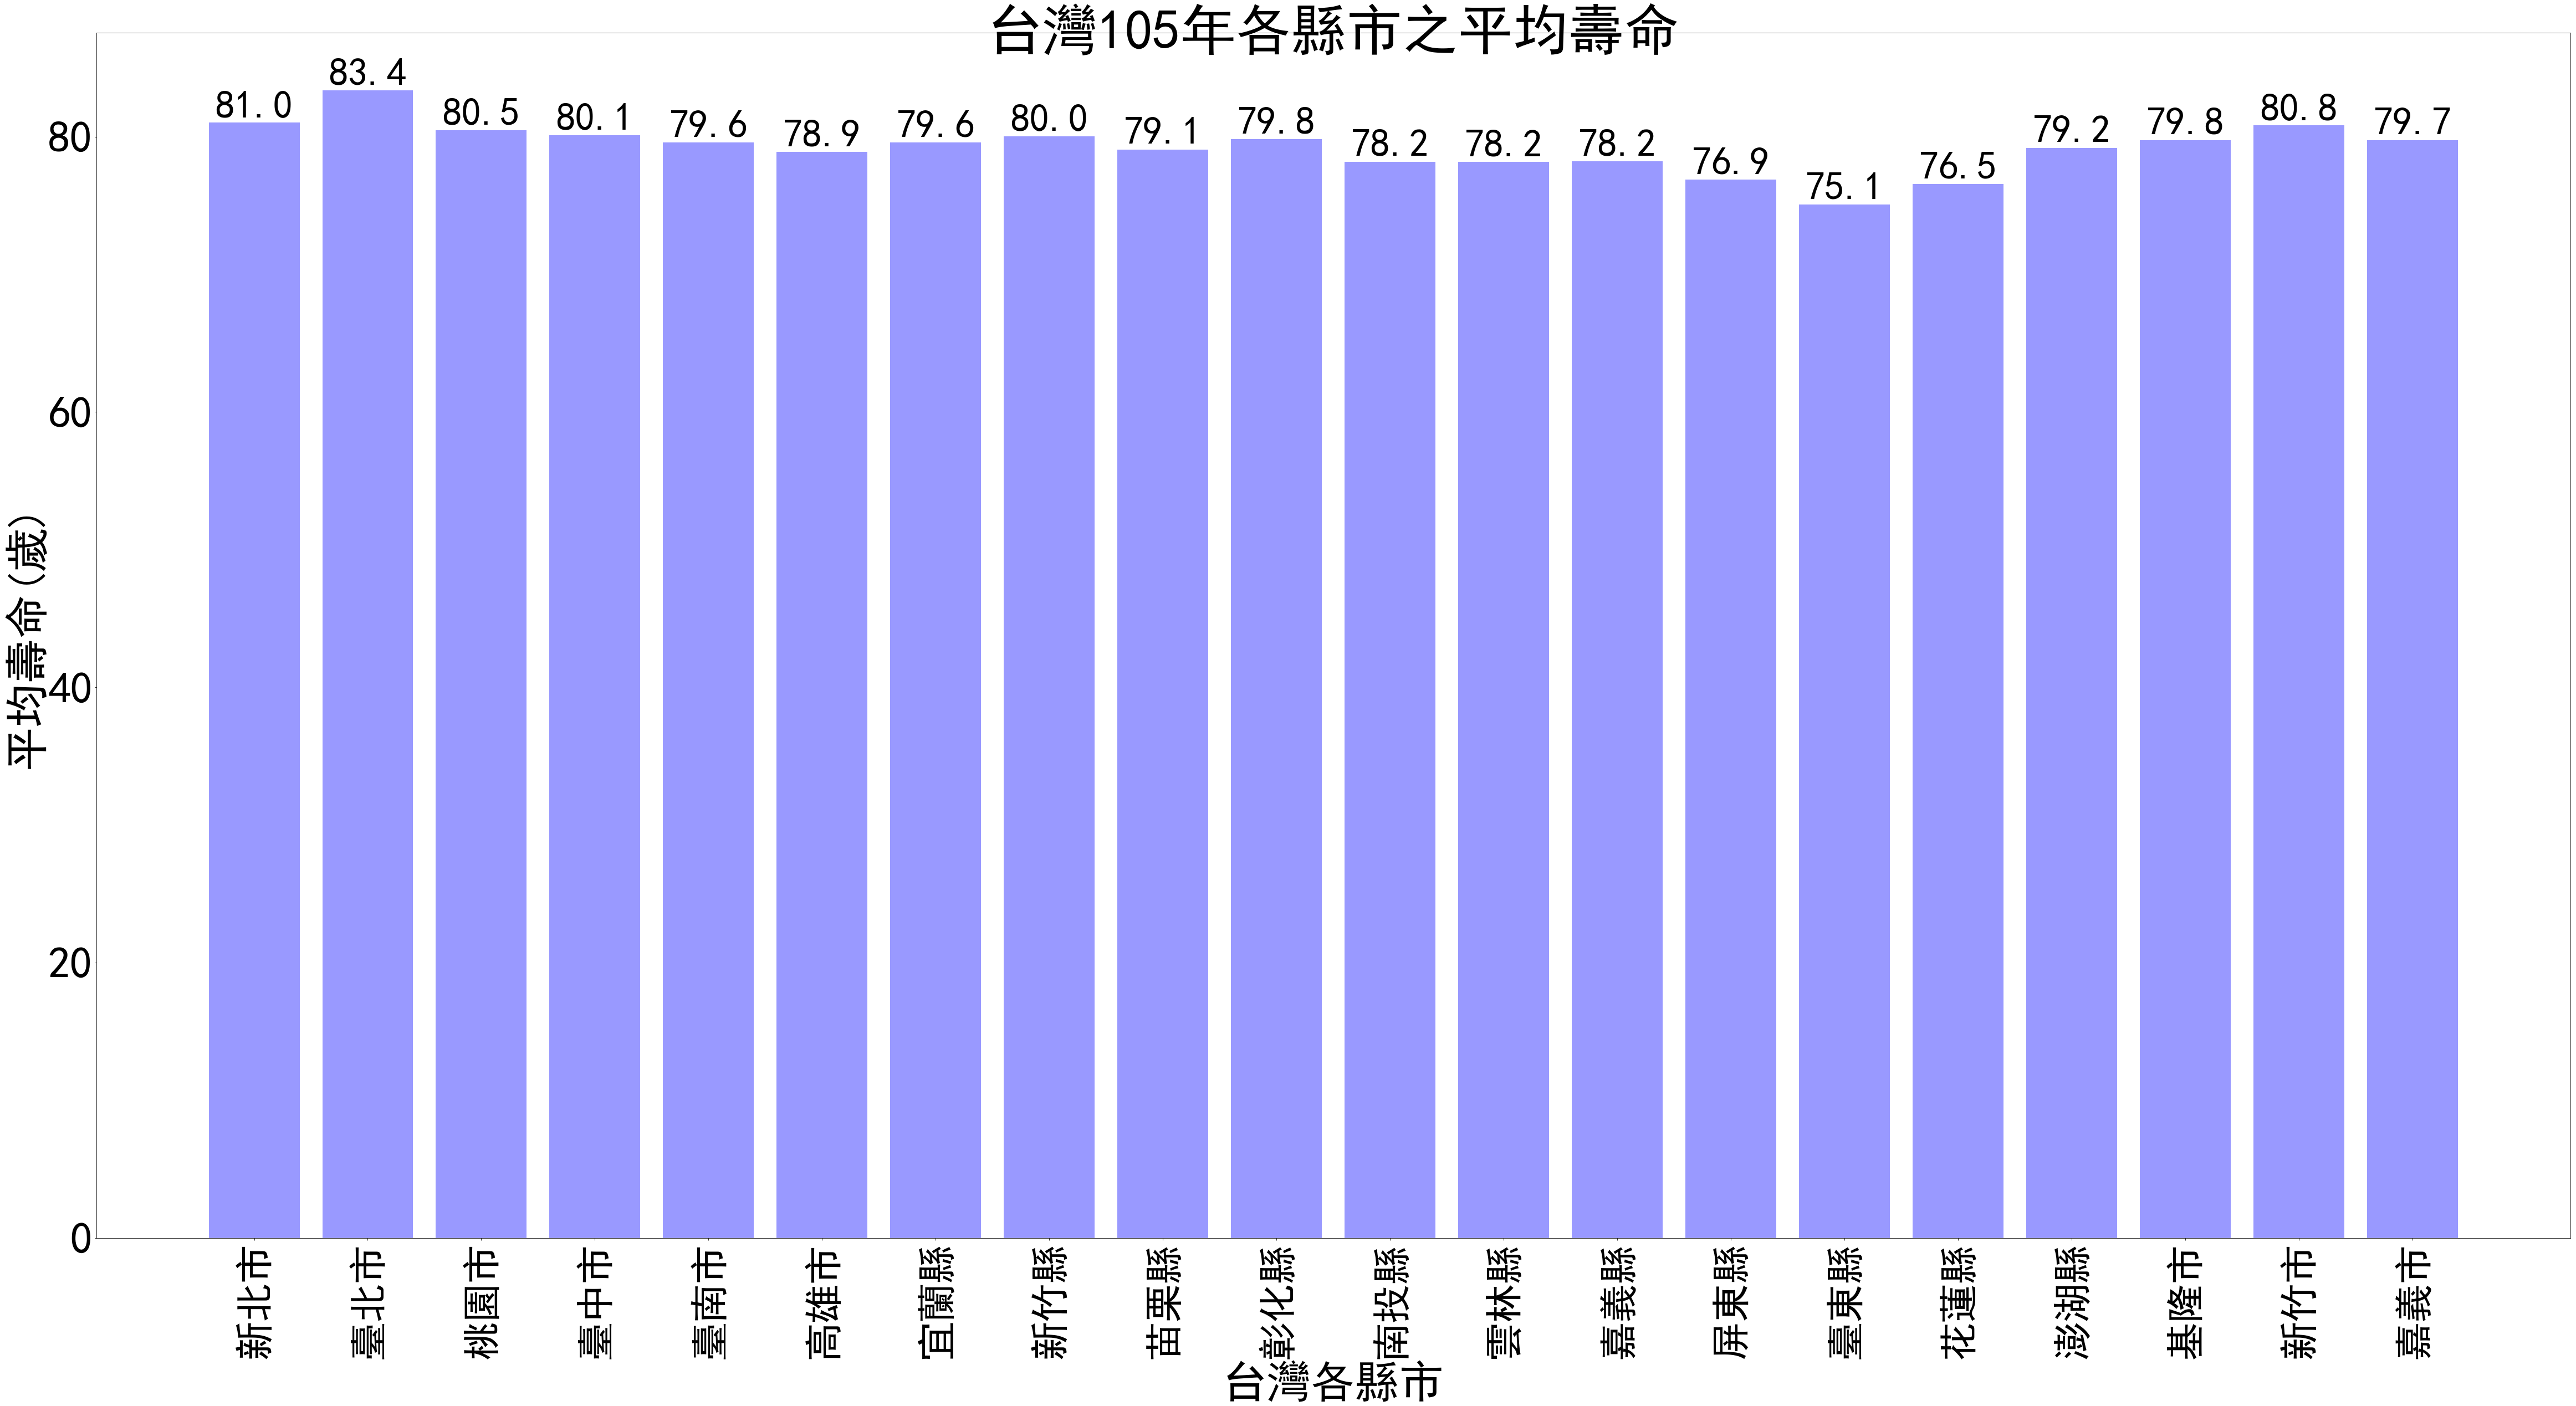

In [14]:
plt.figure(figsize=(80,40))
plt.yticks(list(range(0,160,20)),fontsize=80)
plt.xticks(fontsize=70,rotation=90)
plt.bar(agedf['區域別'],agedf["105"], color="#9999ff")
plt.xlabel('台灣各縣市',fontsize=80)
plt.ylabel('平均壽命(歲)',fontsize=80)
plt.title('台灣105年各縣市之平均壽命',fontsize=100,fontweight='medium',verticalalignment='center')
for a,b in zip(agedf['區域別'],agedf["105"]):  
    plt.text(a, b+0.05, '%.1f' % b, ha='center', va= 'bottom',fontsize=70)
plt.show()

In [15]:
codepart=newdf["鄉鎮市區名稱"][:len(newdf["鄉鎮市區名稱"])-2]
a=[]
for i in range(len(codepart)):
        for j in range(len(agedf['區域別'])):
            if codepart[i][0:3]==agedf['區域別'][j]:
                a.append ( float(agedf["105"][list(agedf['區域別']).index( agedf['區域別'][j] )]) )
#去除不需要的欄位
newdf.drop([164,165],inplace=True)
newdf["平均壽命"]=a
newdf

,鄉鎮市區名稱,醫院家數,醫事人員總計,護理師,護士,護理人員總計,年底人口數,分配比例(護),分配比例(總),平均壽命
0,臺北市松山區,5,2178,1130,140,1270,206988,162.982677,95.035813,83.362839
1,臺北市大安區,5,2485,1258,120,1378,309969,224.941219,124.736016,83.362839
2,臺北市大同區,1,4407,2483,165,2648,129278,48.820997,29.334695,83.362839
3,臺北市中山區,4,2777,1562,77,1639,230710,140.762660,83.078862,83.362839
4,臺北市內湖區,3,3262,1842,87,1929,287771,149.181441,88.219191,83.362839
5,臺北市士林區,1,1978,1170,39,1209,288295,238.457403,145.750758,83.362839
6,臺北市北投區,6,8247,4904,116,5020,256456,51.086853,31.096884,83.362839
7,臺北市信義區,2,1769,952,49,1001,225753,225.527473,127.616167,83.362839
8,臺北市中正區,3,5511,3213,10,3223,159608,49.521564,28.961713,83.362839
9,臺北市萬華區,4,585,282,37,319,191850,601.410658,327.948718,83.362839


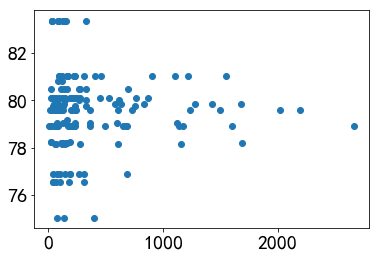

In [16]:
#去除離群值
newdf.drop([84,90],inplace=True)
import matplotlib.pyplot as plt
plt.scatter(newdf["分配比例總"],newdf["平均壽命"])
plt.show()